In [3]:
import numpy as np
from statistics import median
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
import pingouin as pg
import sys
import seaborn as sns

print(sys.executable)

/Users/elisarumbos/anaconda3/envs/vesicleSTORM/bin/python


In [4]:
def pval_significance(pval):
    if pval < 0.0005:
        significance = '***'
    elif pval<0.005:
        significance = '**' 
    elif pval<0.05:
        significance = '*'
    elif pval>0.05:
        significance = '-'
        
    return significance

In [5]:
#upload csv file
storm_data = pd.read_pickle('/Volumes/Seagate/Elisa_STORM/Good_Images/storm_data.pkl')

#data filtering (Combine SPON/DEP with DIV)
storm_data['markertype and DIV'] = pd.concat([storm_data['647nm'], storm_data['DIV']], axis=1).apply(lambda row: ''.join(map(str, row)), axis=1)

#Separate RIMBP and Bassoon
storm_data['647_680'] = pd.concat([storm_data['647nm'], storm_data['680nm']], axis=1).apply(lambda row: ''.join(map(str, row)), axis=1)
storm_data['647_DIV_680'] = pd.concat([storm_data['680nm'], storm_data['markertype and DIV']], axis=1).apply(lambda row: ''.join(map(str, row)), axis=1)

#remove data in which the mean nearest neighbour distance from 1 channel to another is above a certain threshold. this value might differ depending on the targeted markers.
storm_data = storm_data[storm_data['mean_coloc_680'] <=1000]

#filter out clusters which are too small. Including these tiny clusters might create problems in the analysis. 
storm_data = storm_data[storm_data['volume'] >= 0.0266]

#remove clusters which contain too many or too few points
storm_data = storm_data[storm_data['point count'] >=50]
storm_data = storm_data[storm_data['point count'] <=8000]


<Axes: xlabel='volume', ylabel='point count'>

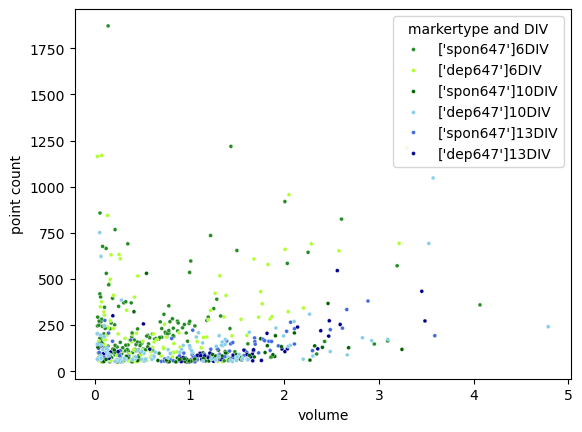

In [93]:
conditions = ['DEP and 6DIV', 'DEP and 10DIV', 'DEP and 13DIV', 'SPON and 6DIV', 'SPON and 10DIV', 'SPON and 13DIV']

custom_palette = ['forestgreen', 'greenyellow', 'darkgreen', 'skyblue', 'royalblue', 'darkblue']

sns.scatterplot(data=storm_data, x = 'volume', y = 'point count' , hue = 'markertype and DIV', s=8, palette=custom_palette)

#sns.regplot(data=storm_data, x = 'volume', y = 'point_count')

/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/1772656094.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=storm_data, x = 'markertype and DIV', y = 'point count', ax=axes[0], order=order, linewidth=0, palette=custom_palette, alpha=1, legend = False)
/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/1772656094.py:73: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval_dep_pc = np.float64(Welch_ANOVA_dep_pc['p-unc'])
/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/1772656094.py:138: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval_spon_pc = np.float64(Welch_ANOVA_spon_pc['p-unc'])
/var

There is evidence of unequal variances. Welch's ANOVA Used
3.647602350755711e-05
There is evidence of unequal variances. Welch's ANOVA Used
2.7763667079571625e-10
There is evidence of unequal variances. Welch's ANOVA Used
6.207259125592868e-07
No evidence of unequal variances. One-Way ANOVA Used
5.469519104883058e-13


/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/1772656094.py:194: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_dep_vol = pd.concat([
/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/1772656094.py:217: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval_dep_vol = np.float64(Welch_ANOVA_dep_vol['p-unc'])
/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/1772656094.py:297: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=storm_data, x='markertyp

No evidence of unequal variances. One-Way ANOVA Used
0.4119850756053658
There is evidence of unequal variances. Welch's ANOVA Used
0.3241057050720682


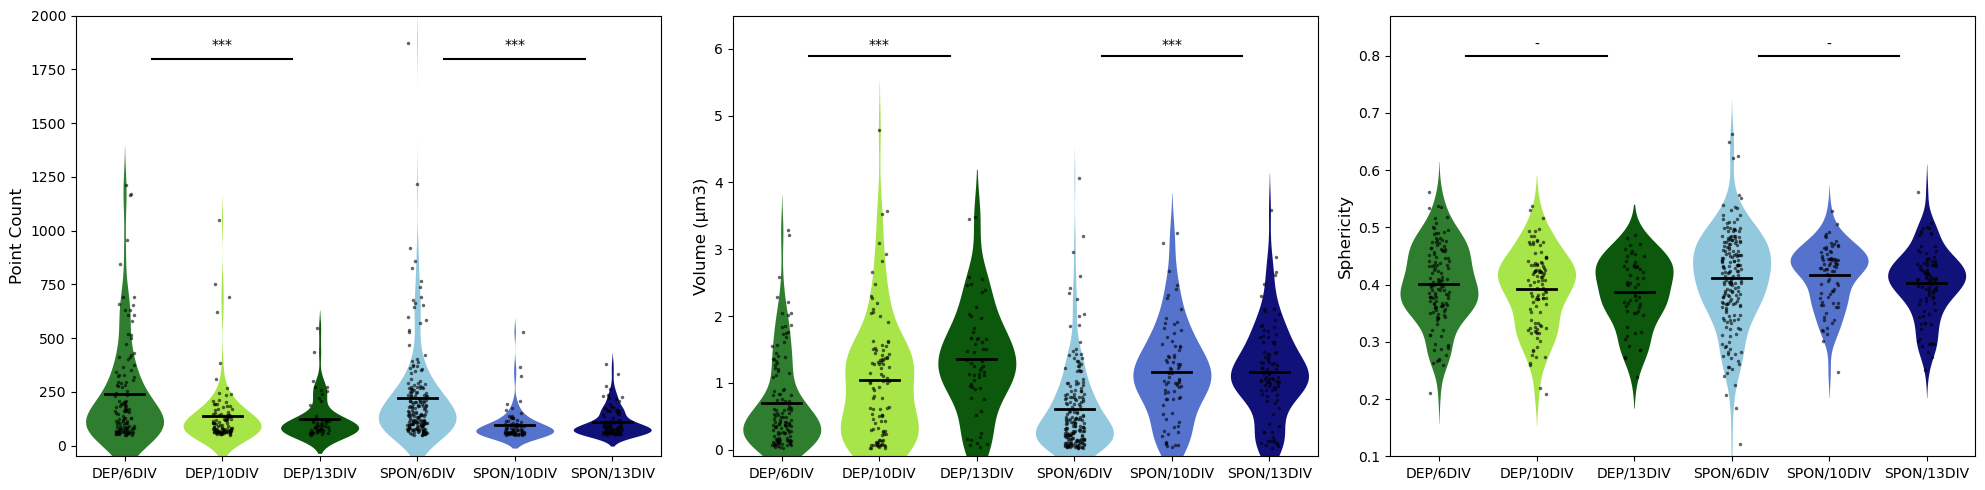

In [137]:
#ME

custom_palette = ['forestgreen', 'greenyellow', 'darkgreen', 'skyblue', 'royalblue', 'darkblue']

order = ["['dep647']6DIV", "['dep647']10DIV", "['dep647']13DIV", "['spon647']6DIV", "['spon647']10DIV", "['spon647']13DIV"]
conditions = ['DEP/6DIV', 'DEP/10DIV', 'DEP/13DIV', 'SPON/6DIV', 'SPON/10DIV', 'SPON/13DIV']

# Set up plot
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

## Point count plot

sns.violinplot(data=storm_data, x = 'markertype and DIV', y = 'point count', ax=axes[0], order=order, linewidth=0, palette=custom_palette, alpha=1, legend = False)
sns.stripplot(data=storm_data, x= 'markertype and DIV', y='point count', ax=axes[0], order=order, jitter=True, color='black', alpha=0.6, size=2.5, legend = False)

axes[0].set_xlim([-0.5, len(storm_data['markertype and DIV'].unique())-0.5])
axes[0].set_ylim([-50, 2000])

mean_values = [storm_data[storm_data['markertype and DIV'] == order]['point count'].mean() for order in order]
for i, mean_val in enumerate(mean_values):
    axes[0].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

#Statistical Tests and Plot

#Test for Dep Data        

#Test for equal variance for DEP data 
levene_statistic_dep_pc, levene_p_value_dep_pc = sc.levene(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['point count'], 
                                                           storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['point count'],
                                                           storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['point count'])

if levene_p_value_dep_pc < 0.05:
    print("There is evidence of unequal variances. Welch's ANOVA Used")

    #Welch's ANOVA for dep data

    #Put the data into lists
    dep647_6DIV_point_count = list(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['point count'])
    dep647_10DIV_point_count = list(storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['point count'])
    dep647_13DIV_point_count = list(storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['point count'])

    # Determine the maximum length among the lists
    max_length = max(len(dep647_6DIV_point_count), len(dep647_10DIV_point_count), len(dep647_13DIV_point_count))

    # Create a DataFrame
    df_dep_pc = pd.DataFrame(columns=['Point Count', 'Condition'])

    # Add rows to the DataFrame
    for i in range(max_length):
        df_dep_pc = pd.concat([
            df_dep_pc,
            pd.DataFrame({
                'Point Count': [
                    dep647_6DIV_point_count[i] if i < len(dep647_6DIV_point_count) else None,
                    dep647_10DIV_point_count[i] if i < len(dep647_10DIV_point_count) else None,
                    dep647_13DIV_point_count[i] if i < len(dep647_13DIV_point_count) else None
                ],
                'Condition': ['dep647_6DIV_point_count', 'dep647_10DIV_point_count', 'dep647_13DIV_point_count']
            })
        ], ignore_index=True)

    # Convert the "Point Count" column to numeric, forcing errors to NaN
    df_dep_pc['Point Count'] = pd.to_numeric(df_dep_pc['Point Count'], errors='coerce')

    # Drop rows with NaN values in the "Point Count" column
    df_dep_pc = df_dep_pc.dropna(subset=['Point Count'])

    # Resetting the index after dropping rows
    df_dep_pc = df_dep_pc.reset_index(drop=True)

    #Perform Welch's ANOVA
    Welch_ANOVA_dep_pc = pg.welch_anova(dv='Point Count', between='Condition', data=df_dep_pc) 
    pval_dep_pc = np.float64(Welch_ANOVA_dep_pc['p-unc'])
    
    print(pval_dep_pc)
    
else:
    print("No evidence of unequal variances. One-Way ANOVA Used")

    #One-Way ANOVA for dep data
    ftest_dep_pc, pval_dep_pc = sc.f_oneway(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['point count'], 
                                            storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['point count'],
                                            storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['point count'])
    
    print(pval_dep_pc)

axes[0].text(0.25, 0.95, f"{pval_significance(pval_dep_pc)}", ha='center', va='top', transform=axes[0].transAxes)
axes[0].axhline(1800, 0.13, 0.37, color='black', linewidth=1.5)

#Test for Spon Data  

#Test for equal variance for SPON data 
levene_statistic_spon_pc, levene_p_value_spon_pc = sc.levene(storm_data[storm_data['markertype and DIV']=="['spon647']6DIV"]['point count'], 
                                                             storm_data[storm_data['markertype and DIV']=="['spon647']10DIV"]['point count'],
                                                             storm_data[storm_data['markertype and DIV']=="['spon647']13DIV"]['point count'])

if levene_p_value_spon_pc < 0.05:
    print("There is evidence of unequal variances. Welch's ANOVA Used")

    #Welch's ANOVA for dep data

    #Put the data into lists
    spon647_6DIV_point_count = list(storm_data[storm_data['markertype and DIV']=="['spon647']6DIV"]['point count'])
    spon647_10DIV_point_count = list(storm_data[storm_data['markertype and DIV']=="['spon647']10DIV"]['point count'])
    spon647_13DIV_point_count = list(storm_data[storm_data['markertype and DIV']=="['spon647']13DIV"]['point count'])

    # Determine the maximum length among the lists
    max_length = max(len(spon647_6DIV_point_count), len(spon647_10DIV_point_count), len(spon647_13DIV_point_count))

    # Create a DataFrame
    df_spon_pc = pd.DataFrame(columns=['Point Count', 'Condition'])

    # Add rows to the DataFrame
    for i in range(max_length):
        df_spon_pc = pd.concat([
            df_spon_pc,
            pd.DataFrame({
                'Point Count': [
                    spon647_6DIV_point_count[i] if i < len(spon647_6DIV_point_count) else None,
                    spon647_10DIV_point_count[i] if i < len(spon647_10DIV_point_count) else None,
                    spon647_13DIV_point_count[i] if i < len(spon647_13DIV_point_count) else None
                ],
                'Condition': ['spon647_6DIV_point_count', 'spon647_10DIV_point_count', 'spon647_13DIV_point_count']
            })
        ], ignore_index=True)

    # Convert the "Point Count" column to numeric, forcing errors to NaN
    df_spon_pc['Point Count'] = pd.to_numeric(df_spon_pc['Point Count'], errors='coerce')

    # Drop rows with NaN values in the "Point Count" column
    df_spon_pc = df_spon_pc.dropna(subset=['Point Count'])

    # Resetting the index after dropping rows
    df_spon_pc = df_spon_pc.reset_index(drop=True)

    #Perform Welch's ANOVA
    Welch_ANOVA_spon_pc = pg.welch_anova(dv='Point Count', between='Condition', data=df_spon_pc) 
    pval_spon_pc = np.float64(Welch_ANOVA_spon_pc['p-unc'])
    
    print(pval_spon_pc)
    
else:
    print("No evidence of unequal variances. One-Way ANOVA Used")

    #One-Way ANOVA for dep data
    ftest_spon_pc, pval_spon_pc = sc.f_oneway(storm_data[storm_data['markertype and DIV']=="['spon647']6DIV"]['point count'], 
                                              storm_data[storm_data['markertype and DIV']=="['spon647']10DIV"]['point count'],
                                              storm_data[storm_data['markertype and DIV']=="['spon647']13DIV"]['point count'])
    
    print(pval_spon_pc)

axes[0].text(0.75, 0.95, f"{pval_significance(pval_spon_pc)}", ha='center', va='top', transform=axes[0].transAxes)
axes[0].axhline(1800, 0.63, 0.87, color='black', linewidth=1.5)

## Volume Plot
    
sns.violinplot(data=storm_data, x= 'markertype and DIV', y='volume', ax=axes[1], order=order, linewidth=0, palette=custom_palette, alpha=1, legend = False)
sns.stripplot(data=storm_data, x= 'markertype and DIV', y='volume', ax=axes[1], order=order, jitter=True, color='black', alpha=0.6, size=2.5, legend = False)

axes[1].set_xlim([-0.5, len(storm_data['markertype and DIV'].unique())-0.5])
axes[1].set_ylim([-0.1, 6.5])

mean_values = [storm_data[storm_data['markertype and DIV'] == order]['volume'].mean() for order in order]
for i, mean_val in enumerate(mean_values):
    axes[1].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

#Statistical Tests

#DEP
    
#Test for equal variance for DEP data 
levene_statistic_dep_vol, levene_p_value_dep_vol = sc.levene(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['volume'], 
                                                             storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['volume'],
                                                             storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['volume'])

if levene_p_value_dep_vol < 0.05:
    print("There is evidence of unequal variances. Welch's ANOVA Used")

    #Welch's ANOVA for dep data

    #Put the data into lists
    dep647_6DIV_volume = list(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['volume'])
    dep647_10DIV_volume = list(storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['volume'])
    dep647_13DIV_volume = list(storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['volume'])

    # Determine the maximum length among the lists
    max_length = max(len(dep647_6DIV_volume), len(dep647_10DIV_volume), len(dep647_13DIV_volume))

    # Create a DataFrame
    df_dep_vol = pd.DataFrame(columns=['Volume', 'Condition'])

    # Add rows to the DataFrame
    for i in range(max_length):
        df_dep_vol = pd.concat([
            df_dep_vol,
            pd.DataFrame({
                'Volume': [
                    dep647_6DIV_volume[i] if i < len(dep647_6DIV_volume) else None,
                    dep647_10DIV_volume[i] if i < len(dep647_10DIV_volume) else None,
                    dep647_13DIV_volume[i] if i < len(dep647_13DIV_volume) else None
                ],
                'Condition': ['dep647_6DIV_volume', 'dep647_10DIV_volume', 'dep647_13DIV_volume']
            })
        ], ignore_index=True)

    # Convert the "Volume" column to numeric, forcing errors to NaN
    df_dep_vol['Volume'] = pd.to_numeric(df_dep_vol['Volume'], errors='coerce')

    # Drop rows with NaN values in the "Volume" column
    df_dep_vol = df_dep_vol.dropna(subset=['Volume'])

    # Resetting the index after dropping rows
    df = df_dep_vol.reset_index(drop=True)

    #Perform Welch's ANOVA
    Welch_ANOVA_dep_vol = pg.welch_anova(dv='Volume', between='Condition', data=df_dep_vol) 
    pval_dep_vol = np.float64(Welch_ANOVA_dep_vol['p-unc'])
    
else:
    print("No evidence of unequal variances. One-Way ANOVA Used")

    #One-Way ANOVA for dep data
    ftest_dep_vol, pval_dep_vol = sc.f_oneway(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['volume'], 
                                              storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['volume'],
                                              storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['volume'])
    
print(pval_dep_vol)

axes[1].text(0.25, 0.95, f"{pval_significance(pval_dep_vol)}", ha='center', va='top', transform=axes[1].transAxes)
axes[1].axhline(5.9, 0.13, 0.37, color='black', linewidth=1.5)   
    
#SPON

#Test for equal variance for SPON data 
levene_statistic_spon_vol, levene_p_value_spon_vol = sc.levene(storm_data[storm_data['markertype and DIV']=="['spon647']6DIV"]['volume'], 
                                                               storm_data[storm_data['markertype and DIV']=="['spon647']10DIV"]['volume'],
                                                               storm_data[storm_data['markertype and DIV']=="['spon647']13DIV"]['volume'])

if levene_p_value_spon_vol < 0.05:
    print("There is evidence of unequal variances. Welch's ANOVA Used")

    #Welch's ANOVA for SPON data

    #Put the data into lists
    spon647_6DIV_volume = list(storm_data[storm_data['markertype and DIV']=="['spon647']6DIV"]['volume'])
    spon647_10DIV_volume = list(storm_data[storm_data['markertype and DIV']=="['spon647']10DIV"]['volume'])
    spon647_13DIV_volume = list(storm_data[storm_data['markertype and DIV']=="['spon647']13DIV"]['volume'])

    # Determine the maximum length among the lists
    max_length = max(len(spon647_6DIV_volume), len(spon647_10DIV_volume), len(spon647_13DIV_volume))

    # Create a DataFrame
    df_spon_vol = pd.DataFrame(columns=['Volume', 'Condition'])

    # Add rows to the DataFrame
    for i in range(max_length):
        df_spon_vol = pd.concat([
            df_spon_vol,
            pd.DataFrame({
                'Volume': [
                    spon647_6DIV_volume[i] if i < len(spon647_6DIV_volume) else None,
                    spon647_10DIV_volume[i] if i < len(spon647_10DIV_volume) else None,
                    spon647_13DIV_volume[i] if i < len(spon647_13DIV_volume) else None
                ],
                'Condition': ['spon647_6DIV_volume', 'spon647_10DIV_volume', 'spon647_13DIV_volume']
            })
        ], ignore_index=True)

    # Convert the "Volume" column to numeric, forcing errors to NaN
    df_spon_vol['Volume'] = pd.to_numeric(df_spon_vol['Volume'], errors='coerce')

    # Drop rows with NaN values in the "Volume" column
    df_spon_vol = df_spon_vol.dropna(subset=['Volume'])

    # Resetting the index after dropping rows
    df = df_spon_vol.reset_index(drop=True)

    #Perform Welch's ANOVA
    Welch_ANOVA_spon_vol = pg.welch_anova(dv='Volume', between='Condition', data=df_spon_vol) 
    pval_spon_vol = np.float64(Welch_ANOVA_spon_vol['p-unc'])
    
else:
    print("No evidence of unequal variances. One-Way ANOVA Used")

    #One-Way ANOVA for SPON data
    ftest_spon_vol, pval_spon_vol = sc.f_oneway(storm_data[storm_data['markertype and DIV']=="['spon647']6DIV"]['volume'], 
                                                storm_data[storm_data['markertype and DIV']=="['spon647']10DIV"]['volume'],
                                                storm_data[storm_data['markertype and DIV']=="['spon647']13DIV"]['volume'])
    
print(pval_spon_vol)

axes[1].text(0.75, 0.95, f"{pval_significance(pval_spon_vol)}", ha='center', va='top', transform=axes[1].transAxes)
axes[1].axhline(5.9, 0.63, 0.87, color='black', linewidth=1.5)

## Sphericity plot
    
sns.violinplot(data=storm_data, x='markertype and DIV', y='spherecity', ax=axes[2], order=order, label=conditions, linewidth=0, palette=custom_palette, alpha=1, legend = False)
sns.stripplot(data=storm_data, x='markertype and DIV', y='spherecity', ax=axes[2], order=order, jitter=True, color = 'black', alpha=0.6, size=2.5, legend = False)

axes[2].set_xlim([-0.5, len(storm_data['markertype and DIV'].unique())-0.5])
axes[2].set_ylim([0.1, 0.87])

mean_values = [storm_data[storm_data['markertype and DIV'] == order]['spherecity'].mean() for order in order]
for i, mean_val in enumerate(mean_values):
    axes[2].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

#Statistical Tests
    
#DEP
    
levene_statistic_dep_sph, levene_p_value_dep_sph = sc.levene(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['spherecity'], 
                                                             storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['spherecity'],
                                                             storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['spherecity'])

if levene_p_value_dep_sph < 0.05:
    print("There is evidence of unequal variances. Welch's ANOVA Used")

    #Welch's ANOVA for dep data

    #Put the data into lists
    dep647_6DIV_sph = list(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['spherecity'])
    dep647_10DIV_sph = list(storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['spherecity'])
    dep647_13DIV_sph = list(storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['spherecity'])

    # Determine the maximum length among the lists
    max_length = max(len(dep647_6DIV_sph), len(dep647_10DIV_sph), len(dep647_13DIV_sph))

    # Create a DataFrame
    df_dep_sph = pd.DataFrame(columns=['Spherecity', 'Condition'])

    # Add rows to the DataFrame
    for i in range(max_length):
        df_dep_sph = pd.concat([
            df_dep_sph,
            pd.DataFrame({
                'Spherecity': [
                    dep647_6DIV_sph[i] if i < len(dep647_6DIV_sph) else None,
                    dep647_10DIV_sph[i] if i < len(dep647_10DIV_sph) else None,
                    dep647_13DIV_sph[i] if i < len(dep647_13DIV_sph) else None
                ],
                'Condition': ['dep647_6DIV_spherecity', 'dep647_10DIV_spherecity', 'dep647_13DIV_spherecity']
            })
        ], ignore_index=True)

    # Convert the "Spherecity" column to numeric, forcing errors to NaN
    df_dep_sph['Spherecity'] = pd.to_numeric(df_dep_sph['Spherecity'], errors='coerce')

    # Drop rows with NaN values in the "Spherecity" column
    df_dep_sph = df_dep_sph.dropna(subset=['Spherecity'])

    # Resetting the index after dropping rows
    df = df_dep_sph.reset_index(drop=True)

    #Perform Welch's ANOVA
    Welch_ANOVA_dep_sph = pg.welch_anova(dv='Spherecity', between='Condition', data=df_dep_sph) 
    pval_dep_sph = np.float64(Welch_ANOVA_dep_sph['p-unc'])
    
else:
    print("No evidence of unequal variances. One-Way ANOVA Used")

    #One-Way ANOVA for dep data
    ftest_dep_sph, pval_dep_sph = sc.f_oneway(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['spherecity'], 
                                              storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['spherecity'],
                                              storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['spherecity'])
    
print(pval_dep_sph)

axes[2].text(0.25, 0.95, f"{pval_significance(pval_dep_sph)}", ha='center', va='top', transform=axes[2].transAxes)
axes[2].axhline(0.8, 0.13, 0.37, color='black', linewidth=1.5)

#SPON

levene_statistic_spon_sph, levene_p_value_spon_sph = sc.levene(storm_data[storm_data['markertype and DIV']=="['spon647']6DIV"]['spherecity'], 
                                                               storm_data[storm_data['markertype and DIV']=="['spon647']10DIV"]['spherecity'],
                                                               storm_data[storm_data['markertype and DIV']=="['spon647']13DIV"]['spherecity'])

if levene_p_value_spon_sph < 0.05:
    print("There is evidence of unequal variances. Welch's ANOVA Used")

    #Welch's ANOVA for SPON data

    #Put the data into lists
    spon647_6DIV_sph = list(storm_data[storm_data['markertype and DIV']=="['spon647']6DIV"]['spherecity'])
    spon647_10DIV_sph = list(storm_data[storm_data['markertype and DIV']=="['spon647']10DIV"]['spherecity'])
    spon647_13DIV_sph = list(storm_data[storm_data['markertype and DIV']=="['spon647']13DIV"]['spherecity'])

    # Determine the maximum length among the lists
    max_length = max(len(spon647_6DIV_sph), len(spon647_10DIV_sph), len(spon647_13DIV_sph))

    # Create a DataFrame
    df_spon_sph = pd.DataFrame(columns=['Spherecity', 'Condition'])

    # Add rows to the DataFrame
    for i in range(max_length):
        df_spon_sph = pd.concat([
            df_spon_sph,
            pd.DataFrame({
                'Spherecity': [
                    spon647_6DIV_sph[i] if i < len(spon647_6DIV_sph) else None,
                    spon647_10DIV_sph[i] if i < len(spon647_10DIV_sph) else None,
                    spon647_13DIV_sph[i] if i < len(spon647_13DIV_sph) else None
                ],
                'Condition': ['spon647_6DIV_spherecity', 'spon647_10DIV_spherecity', 'spon647_13DIV_spherecity']
            })
        ], ignore_index=True)

    # Convert the "Spherecity" column to numeric, forcing errors to NaN
    df_spon_sph['Spherecity'] = pd.to_numeric(df_spon_sph['Spherecity'], errors='coerce')

    # Drop rows with NaN values in the "Spherecity" column
    df_spon_sph = df_spon_sph.dropna(subset=['Spherecity'])

    # Resetting the index after dropping rows
    df = df_spon_sph.reset_index(drop=True)

    #Perform Welch's ANOVA
    Welch_ANOVA_spon_sph = pg.welch_anova(dv='Spherecity', between='Condition', data=df_spon_sph) 
    pval_spon_sph = np.float64(Welch_ANOVA_spon_sph['p-unc'])
    
else:
    print("No evidence of unequal variances. One-Way ANOVA Used")

    #One-Way ANOVA for SPON data
    ftest_spon_sph, pval_spon_sph = sc.f_oneway(storm_data[storm_data['markertype and DIV']=="['spon647']6DIV"]['spherecity'], 
                                                storm_data[storm_data['markertype and DIV']=="['spon647']10DIV"]['spherecity'],
                                                storm_data[storm_data['markertype and DIV']=="['spon647']13DIV"]['spherecity'])
    
print(pval_spon_sph)

axes[2].text(0.75, 0.95, f"{pval_significance(pval_spon_sph)}", ha='center', va='top', transform=axes[2].transAxes)
axes[2].axhline(0.8, 0.63, 0.87, color='black', linewidth=1.5)

# Add titles and axis labels
ylabels = ['Point Count', 'Volume (µm3)', 'Sphericity']

for i in [0,1,2]:
    axes[i].set_ylabel(ylabels[i], fontsize=12)
    axes[i].set_xticks([0, 1, 2, 3, 4, 5])
    axes[i].set_xticklabels(conditions)
    axes[i].set(xlabel = None)

fig.tight_layout()

In [86]:
#Put the data into lists
dep647_6DIV_point_count = list(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['point count'])
dep647_10DIV_point_count = list(storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['point count'])
dep647_13DIV_point_count = list(storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['point count'])

# Determine the maximum length among the lists
max_length = max(len(dep647_6DIV_point_count), len(dep647_10DIV_point_count), len(dep647_13DIV_point_count))

# Create a DataFrame
df = pd.DataFrame(columns=['Point Count', 'Condition'])

# Add rows to the DataFrame
for i in range(max_length):
    df = pd.concat([
        df,
        pd.DataFrame({
            'Point Count': [
                dep647_6DIV_point_count[i] if i < len(dep647_6DIV_point_count) else None,
                dep647_10DIV_point_count[i] if i < len(dep647_10DIV_point_count) else None,
                dep647_13DIV_point_count[i] if i < len(dep647_13DIV_point_count) else None
            ],
            'Condition': ['dep647_6DIV_point_count', 'dep647_10DIV_point_count', 'dep647_13DIV_point_count']
        })
    ], ignore_index=True)

# Convert the "NumberLists" column to numeric, forcing errors to NaN
df['Point Count'] = pd.to_numeric(df['Point Count'], errors='coerce')

# Drop rows with NaN values in the "Point Count" column
df = df.dropna(subset=['Point Count'])

# Resetting the index after dropping rows
df = df.reset_index(drop=True)

#Perform Welch's ANOVA
Welch_ANOVA = pg.welch_anova(dv='Point Count', between='Condition', data=df) 

Welch_ANOVA['p-unc']

0    0.000477
Name: p-unc, dtype: float64

In [113]:
##Stats Pipeline

#Test for equal variance for DEP data 
levene_statistic, levene_p_value = sc.levene(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['point count'], 
                                             storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['point count'],
                                             storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['point count'])

if levene_p_value < 0.05:
    print("There is evidence of unequal variances. Welch's ANOVA Used")

    #Welch's ANOVA for dep data

    #Put the data into lists
    dep647_6DIV_point_count = list(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['point count'])
    dep647_10DIV_point_count = list(storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['point count'])
    dep647_13DIV_point_count = list(storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['point count'])

    # Determine the maximum length among the lists
    max_length = max(len(dep647_6DIV_point_count), len(dep647_10DIV_point_count), len(dep647_13DIV_point_count))

    # Create a DataFrame
    df = pd.DataFrame(columns=['Point Count', 'Condition'])

    # Add rows to the DataFrame
    for i in range(max_length):
        df = pd.concat([
            df,
            pd.DataFrame({
                'Point Count': [
                    dep647_6DIV_point_count[i] if i < len(dep647_6DIV_point_count) else None,
                    dep647_10DIV_point_count[i] if i < len(dep647_10DIV_point_count) else None,
                    dep647_13DIV_point_count[i] if i < len(dep647_13DIV_point_count) else None
                ],
                'Condition': ['dep647_6DIV_point_count', 'dep647_10DIV_point_count', 'dep647_13DIV_point_count']
            })
        ], ignore_index=True)

    # Convert the "Point Count" column to numeric, forcing errors to NaN
    df['Point Count'] = pd.to_numeric(df['Point Count'], errors='coerce')

    # Drop rows with NaN values in the "Point Count" column
    df = df.dropna(subset=['Point Count'])

    # Resetting the index after dropping rows
    df = df.reset_index(drop=True)

    #Perform Welch's ANOVA
    Welch_ANOVA = pg.welch_anova(dv='Point Count', between='Condition', data=df) 
    pval_dep_pc = np.float64(Welch_ANOVA['p-unc'])
    
    print(pval_dep_pc)
    
else:
    print("No evidence of unequal variances. One-Way ANOVA Used")

    #One-Way ANOVA for dep data
    ftest_dep_pc, pval_dep_pc = sc.f_oneway(storm_data[storm_data['markertype and DIV']=="['dep647']6DIV"]['point count'], 
                                            storm_data[storm_data['markertype and DIV']=="['dep647']10DIV"]['point count'],
                                            storm_data[storm_data['markertype and DIV']=="['dep647']13DIV"]['point count'])
    
    print(pval_dep_pc)

There is evidence of unequal variances. Welch's ANOVA Used
3.647602350755711e-05


/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/439022322.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval_dep_pc = np.float64(Welch_ANOVA['p-unc'])


In [ ]:
#ISA

x = 'markertype and DIV'
custom_palette = ['forestgreen', 'greenyellow', 'royalblue', 'skyblue', 'pink', 'hotpink']

order = ['DEP6476DIV', 'DEP64710DIV', 'DEP64713DIV','SPON6476DIV', 'SPON64710DIV',  'SPON64713DIV']
conditions = ['DEP/6DIV', 'DEP/10DIV', 'DEP/13DIV', 'SPON/86DIV', 'SPON/10DIV',  'SPON/13DIV']

# Set up plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Point count plot
sns.violinplot(data=storm_data, x=x, y='point count', ax=axes[0], order=order, 
             linewidth=0, palette=custom_palette, alpha=0.5)
sns.stripplot(data=storm_data, x=x, y='point count', 
              ax=axes[0], order=order, jitter=True, color='black', alpha=0.6, size=2.5)

axes[0].set_xlim([-0.5, len(storm_data[x].unique())-0.5])
axes[0].set_ylim([-200, 10500])

mean_values = [storm_data[storm_data[x] == order]['point count'].mean() for order in order]
for i, mean_val in enumerate(mean_values):
    axes[0].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

# calculate the p-value and plot 

#t-test for dep data
ttest_dep_pc, pval_dep_pc = sc.ttest_ind(storm_data[storm_data['markertype and DIV']=='DEP6478DIV']['point count'], 
                          storm_data[storm_data['markertype and DIV']=='DEP64710DIV']['point count'])

axes[0].text(0.25, 0.95, f"{pval_significance(pval_dep_pc)}", ha='center', va='top', transform=axes[0].transAxes)
axes[0].axhline(9500, 0.13, 0.37, color='black', linewidth=1.5)
    
#t-test for spon data
ttest_spon_pc, pval_spon_pc = sc.ttest_ind(storm_data[storm_data['markertype and DIV']=='SPON6478DIV']['point count'], 
                          storm_data[storm_data['markertype and DIV']=='SPON64710DIV']['point count'])

axes[0].text(0.75, 0.95, f"{pval_significance(pval_spon_pc)}", ha='center', va='top', transform=axes[0].transAxes)
axes[0].axhline(9500, 0.63, 0.87, color='black', linewidth=1.5)

#######

# Volume plot
sns.violinplot(data=storm_data, x=x, y='volume', ax=axes[1], order=order,
             linewidth=0, palette=custom_palette, alpha=0.5)
sns.stripplot(data=storm_data, x=x, y='volume', 
              ax=axes[1], order=order, jitter=True, color='black', alpha=0.6, size=2.5)

axes[1].set_xlim([-0.5, len(storm_data[x].unique())-0.5])
axes[1].set_ylim([-0.1, 5])

mean_values = [storm_data[storm_data[x] == order]['volume'].mean() for order in order]
for i, mean_val in enumerate(mean_values):
    axes[1].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

# calculate the p-value and plot 
ttest_dep_vol, pval_dep_vol = sc.ttest_ind(storm_data[storm_data['markertype and DIV']=='DEP6478DIV']['volume'], 
                           storm_data[storm_data['markertype and DIV']=='DEP64710DIV']['volume'])

axes[1].text(0.25, 0.95, f"{pval_significance(pval_dep_vol)}", ha='center', va='top', transform=axes[1].transAxes)
axes[1].axhline(4.5, 0.13, 0.37, color='black', linewidth=1.5)
    

ttest_spon_vol, pval_spon_vol = sc.ttest_ind(storm_data[storm_data['markertype and DIV']=='SPON6478DIV']['volume'], 
                           storm_data[storm_data['markertype and DIV']=='SPON64710DIV']['volume'])

axes[1].text(0.75, 0.95, f"{pval_significance(pval_spon_vol)}", ha='center', va='top', transform=axes[1].transAxes)
axes[1].axhline(4.5, 0.63, 0.87, color='black', linewidth=1.5)
        
######

# Sphericity plot
sns.violinplot(data=storm_data, x=x, y='spherecity', ax=axes[2], order=order, 
               label=conditions, linewidth=0, palette=custom_palette, alpha=1)
sns.stripplot(data=storm_data, x=x, y='spherecity', 
              ax=axes[2], order=order, jitter=True, color = 'black', alpha=0.6, size=2.5)

axes[2].set_xlim([-0.5, len(storm_data[x].unique())-0.5])
axes[2].set_ylim([0.1, 0.87])

mean_values = [storm_data[storm_data[x] == order]['spherecity'].mean() for order in order]
for i, mean_val in enumerate(mean_values):
    axes[2].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

ttest_dep_sph, pval_dep_sph = sc.ttest_ind(storm_data[storm_data['markertype and DIV']=='DEP6478DIV']['spherecity'], 
                           storm_data[storm_data['markertype and DIV']=='DEP64710DIV']['spherecity'])

axes[2].text(0.25, 0.95, f"{pval_significance(pval_dep_sph)}", ha='center', va='top', transform=axes[2].transAxes)
axes[2].axhline(0.8, 0.13, 0.37, color='black', linewidth=1.5)
    
# calculate the p-value and plot 
ttest_spon_sph, pval_spon_sph = sc.ttest_ind(storm_data[storm_data['markertype and DIV']=='SPON6478DIV']['spherecity'], 
                           storm_data[storm_data['markertype and DIV']=='SPON64710DIV']['spherecity'])

axes[2].text(0.75, 0.95, f"{pval_significance(pval_spon_sph)}", ha='center', va='top', transform=axes[2].transAxes)
axes[2].axhline(0.8, 0.63, 0.87, color='black', linewidth=1.5)
       
########  

# Add titles and axis labels
ylabels = ['Point Count', 'Volume (µm3)', 'Sphericity']

for i in [0,1,2]:
    axes[i].set_ylabel(ylabels[i], fontsize=12)
    axes[i].set_xticks([0, 1, 2, 3, 4, 5])
    axes[i].set_xticklabels(conditions)
    axes[i].set(xlabel = None)

# Show plot

/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/2560017509.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=storm_data.sort_values(by=['647_DIV_680']), x='647_DIV_680', y='mean_coloc_680', order=order, linewidth=0, palette=custom_palette)
/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/2560017509.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=storm_data, x = '647_DIV_680', y = 'mean_coloc_680', order=order, linewidth=0, palette=custom_palette, alpha=1, legend = False)
/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/2560017509.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. 

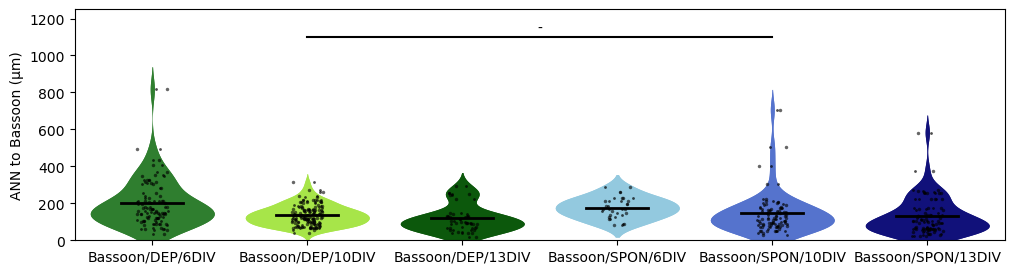

In [152]:
#Plot Bassoon

x = '647_680'
custom_palette = ['forestgreen', 'greenyellow', 'darkgreen', 'skyblue', 'royalblue', 'darkblue']

# Update the order of conditions
order = ["['bassoon680']['dep647']6DIV", "['bassoon680']['dep647']10DIV", "['bassoon680']['dep647']13DIV",
         "['bassoon680']['spon647']6DIV", "['bassoon680']['spon647']10DIV", "['bassoon680']['spon647']13DIV"]

conditions = ['Bassoon/DEP/6DIV', 'Bassoon/DEP/10DIV', 'Bassoon/DEP/13DIV', 'Bassoon/SPON/6DIV', 'Bassoon/SPON/10DIV', 'Bassoon/SPON/13DIV']


#Calculate the p-value for the independent t-test
ttest_ANN, pval_ANN = sc.ttest_ind(storm_data[storm_data[x]=="['dep647']['bassoon680']"]['mean_coloc_680'], 
                                   storm_data[storm_data[x]=="['spon647']['bassoon680']"]['mean_coloc_680'])


# Set up plot
fig, axes = plt.subplots(1, 1, figsize=(12, 3))

# Volume plot with updated order

sns.violinplot(data=storm_data.sort_values(by=['647_DIV_680']), x='647_DIV_680', y='mean_coloc_680', order=order, linewidth=0, palette=custom_palette)
sns.stripplot(data=storm_data.sort_values(by=['647_DIV_680']), x='647_DIV_680', y='mean_coloc_680', order=order, jitter=True, color='black', alpha=0.7, size=2)

sns.violinplot(data=storm_data, x = '647_DIV_680', y = 'mean_coloc_680', order=order, linewidth=0, palette=custom_palette, alpha=1, legend = False)
sns.stripplot(data=storm_data, x='647_DIV_680', y= 'mean_coloc_680', order=order, jitter=True, color='black', alpha=0.6, size=2.5, legend = False)

plt.xlim([-0.5, len(conditions)-0.5])
plt.ylim([0,1250])

mean_values = [storm_data[storm_data['647_DIV_680'] == order]['mean_coloc_680'].mean() for order in order]

for i, mean_val in enumerate(mean_values):
    plt.plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

#Annotate the graph with p-value
axes.text(0.5, 0.95, f"{pval_significance(pval_ANN)}", ha='center', va='top', transform=axes.transAxes)
axes.axhline(1100, 0.25, 0.75, color='black', linewidth=1.5)


# Update x-axis tick labels and axis labels
axes.set_xticklabels(conditions, fontsize=10)
axes.set_ylabel('ANN to Bassoon (µm)', fontsize=10)
axes.set(xlabel=None)
plt.show()

fig.tight_layout()

In [205]:
# Calculate the p-value for the independent t-test
ttest_ANN, pval_ANN = sc.ttest_ind(storm_data[storm_data['647_DIV_680']=="['bassoon680']['dep647']6DIV"]['mean_coloc_680'], 
                                   storm_data[storm_data['647_DIV_680']=="['bassoon680']['spon647']6DIV"]['mean_coloc_680'])

pval_ANN

0.6326640400475089

/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/64652841.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=storm_data.sort_values(by=['647_DIV_680']), x='647_DIV_680', y='mean_coloc_680', order=order, linewidth=0, palette=custom_palette)
/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/64652841.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=storm_data, x = '647_DIV_680', y = 'mean_coloc_680', order=order, linewidth=0, palette=custom_palette, alpha=1, legend = False)
/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/64652841.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after 

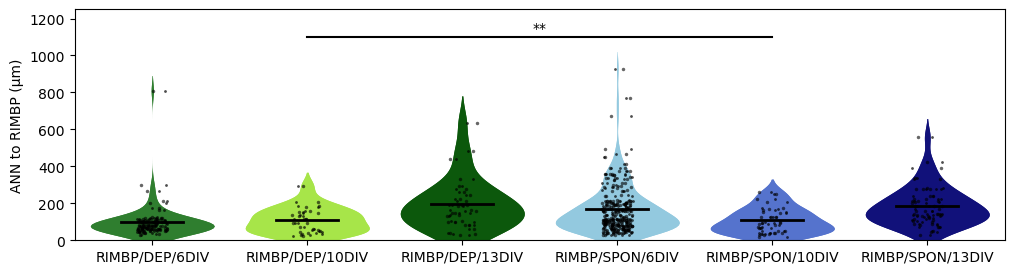

In [150]:
#Plot RIMBP

x = '647_680'
custom_palette = ['forestgreen', 'greenyellow', 'darkgreen', 'skyblue', 'royalblue', 'darkblue']

# Update the order of conditions
order = ["['rimbp680']['dep647']6DIV",   "['rimbp680']['dep647']10DIV",   "['rimbp680']['dep647']13DIV",
         "['rimbp680']['spon647']6DIV",   "['rimbp680']['spon647']10DIV",  "['rimbp680']['spon647']13DIV",]

conditions = ['RIMBP/DEP/6DIV', 'RIMBP/DEP/10DIV', 'RIMBP/DEP/13DIV', 'RIMBP/SPON/6DIV', 'RIMBP/SPON/10DIV', 'RIMBP/SPON/13DIV']


# Calculate the p-value for the independent t-test
ttest_ANN, pval_ANN = sc.ttest_ind(storm_data[storm_data[x]=="['dep647']['rimbp680']"]['mean_coloc_680'], 
                                   storm_data[storm_data[x]=="['spon647']['rimbp680']"]['mean_coloc_680'])


# Set up plot
fig, axes = plt.subplots(1, 1, figsize=(12, 3))

# Volume plot with updated order

sns.violinplot(data=storm_data.sort_values(by=['647_DIV_680']), x='647_DIV_680', y='mean_coloc_680', order=order, linewidth=0, palette=custom_palette)
sns.stripplot(data=storm_data.sort_values(by=['647_DIV_680']), x='647_DIV_680', y='mean_coloc_680', order=order, jitter=True, color='black', alpha=0.7, size=2)

sns.violinplot(data=storm_data, x = '647_DIV_680', y = 'mean_coloc_680', order=order, linewidth=0, palette=custom_palette, alpha=1, legend = False)
sns.stripplot(data=storm_data, x='647_DIV_680', y= 'mean_coloc_680', order=order, jitter=True, color='black', alpha=0.6, size=2.5, legend = False)

plt.xlim([-0.5, len(conditions)-0.5])
plt.ylim([0,1250])

mean_values = [storm_data[storm_data['647_DIV_680'] == order]['mean_coloc_680'].mean() for order in order]

for i, mean_val in enumerate(mean_values):
    plt.plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

#Annotate the graph with p-value
axes.text(0.5, 0.95, f"{pval_significance(pval_ANN)}", ha='center', va='top', transform=axes.transAxes)
axes.axhline(1100, 0.25, 0.75, color='black', linewidth=1.5)

# Update x-axis tick labels and axis labels
axes.set_xticklabels(conditions, fontsize=10)
axes.set_ylabel('ANN to RIMBP (µm)', fontsize=10)
axes.set(xlabel=None)
plt.show()

fig.tight_layout()

In [151]:
# Calculate the p-value for the independent t-test
ttest_ANN, pval_ANN = sc.ttest_ind(storm_data[storm_data['647_DIV_680']=="['rimbp680']['dep647']6DIV"]['mean_coloc_680'], 
                                   storm_data[storm_data['647_DIV_680']=="['rimbp680']['spon647']6DIV"]['mean_coloc_680'])

pval_ANN

0.00011271430565004253

/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_61420/4169392078.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=storm_data.sort_values(by=[x]), x=x, y='stderror_coloc_680', ax=axes[0], order = order, linewidth=0, palette=custom_palette, alpha=1)
/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_61420/4169392078.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(conditions, fontsize=10)
/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_61420/4169392078.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=storm_data.sort_values(by=[x

3.0411388008728324e-06


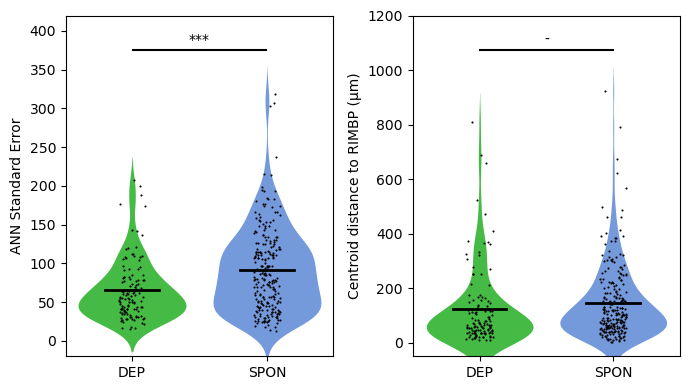

In [6]:
#RIMBP ANN STDER & CENTROID DISTANCE

x = '647_680'
custom_palette = ['limegreen', 'cornflowerblue']
order = ["['dep647']['rimbp680']", "['spon647']['rimbp680']"]
conditions = ['DEP', 'SPON']

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

sns.violinplot(data=storm_data.sort_values(by=[x]), x=x, y='stderror_coloc_680', ax=axes[0], order = order, linewidth=0, palette=custom_palette, alpha=1)
sns.stripplot(data=storm_data.sort_values(by=[x]), x=x, y='stderror_coloc_680', ax=axes[0], order = order, jitter=True, color='black', alpha=1, size=1.5)

plt.xlim([-0.5, len(conditions)-0.5])

#axes[0].set_xlim([-0.5, len(storm_data[x].unique())-0.5])

mean_values_stder = [storm_data[storm_data['647_680'] == order]['stderror_coloc_680'].mean() for order in order]

for i, mean_val in enumerate(mean_values_stder):
    axes[0].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

#for i, group in enumerate(storm_data.groupby(x)):
#    mean_val = group[1]['stderror_coloc_680'].mean()
#    axes[0].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

axes[0].set_xticklabels(conditions, fontsize=10)
axes[0].set_ylabel('ANN Standard Error')
axes[0].set(xlabel=None)
axes[0].set_ylim([-20, 420])

ttest_std, pval_std = sc.ttest_ind(storm_data[storm_data[x]=="['dep647']['rimbp680']"]['stderror_coloc_680'], 
                                   storm_data[storm_data[x]=="['spon647']['rimbp680']"]['stderror_coloc_680'])

print(pval_std)

axes[0].text(0.5, 0.95, f"{pval_significance(pval_std)}", ha='center', va='top', transform=axes[0].transAxes)
axes[0].axhline(375, 0.25, 0.75, color='black', linewidth=1.5)


# centroid distance to rimbp plot
sns.violinplot(data=storm_data.sort_values(by=[x]), x=x, y='centroid_dist_647_to_680', ax=axes[1], order = order, linewidth=0, palette=custom_palette, alpha=1)
sns.stripplot(data=storm_data.sort_values(by=[x]), x=x, y='centroid_dist_647_to_680', order = order, ax=axes[1], jitter=True, color='black', alpha=1, size=1.5)

plt.xlim([-0.5, len(conditions)-0.5])

#axes[1].set_xlim([-0.5, len(storm_data[x].unique())-0.5])

mean_values_centroid = [storm_data[storm_data['647_680'] == order]['centroid_dist_647_to_680'].mean() for order in order]

for i, mean_val in enumerate(mean_values_centroid):
    axes[1].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

#for i, group in enumerate(storm_data.groupby(x)):
#    mean_val = group[1]['centroid_dist_647_to_680'].mean()
#    print(mean_val)
#    axes[1].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

axes[1].set_xticklabels(conditions, fontsize=10)
axes[1].set_ylabel('Centroid distance to RIMBP (µm)', fontsize=10)
axes[1].set(xlabel=None)
axes[1].set_ylim([-50, 1200])

ttest_cent, pval_cent = sc.ttest_ind(storm_data[storm_data[x]=="['dep647']['rimbp680']"]['centroid_dist_647_to_680'], 
                                     storm_data[storm_data[x]=="['spon647']['rimbp680']"]['centroid_dist_647_to_680'])

axes[1].text(0.5, 0.95, f"{pval_significance(pval_cent)}", ha='center', va='top', transform=axes[1].transAxes)
axes[1].axhline(1075, 0.25, 0.75, color='black', linewidth=1.5)


fig.tight_layout()

/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/3336124293.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=storm_data.sort_values(by=[x]), x=x, y='stderror_coloc_680', ax=axes[0], order = order, linewidth=0, palette=custom_palette, alpha=1)
/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/3336124293.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(conditions, fontsize=10)
/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_7934/3336124293.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=storm_data.sort_values(by=[x]),

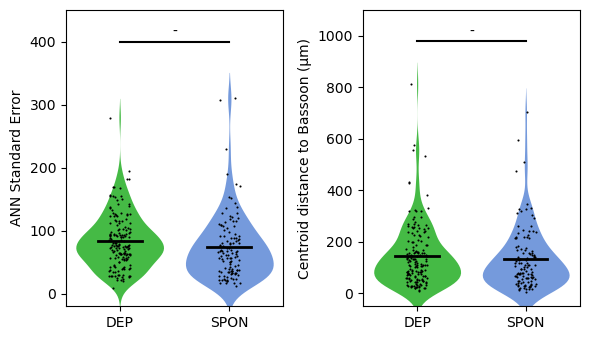

In [149]:
#BASSOON ANN STDER & CENTROID DISTANCE

x = '647_680'

custom_palette = ['limegreen', 'cornflowerblue']

order = ["['dep647']['bassoon680']", "['spon647']['bassoon680']"]

conditions = ['DEP', 'SPON']

fig, axes = plt.subplots(1, 2, figsize=(6, 3.5))

sns.violinplot(data=storm_data.sort_values(by=[x]), x=x, y='stderror_coloc_680', ax=axes[0], order = order, linewidth=0, palette=custom_palette, alpha=1)
sns.stripplot(data=storm_data.sort_values(by=[x]), x=x, y='stderror_coloc_680', ax=axes[0], order = order, jitter=True, color='black', alpha=1, size=1.5)

plt.xlim([-0.5, len(conditions)-0.5])

#axes[0].set_xlim([-0.5, len(storm_data[x].unique())-0.5])

mean_values_stder = [storm_data[storm_data['647_680'] == order]['stderror_coloc_680'].mean() for order in order]

for i, mean_val in enumerate(mean_values_stder):
    axes[0].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

#for i, group in enumerate(storm_data.groupby(x)):
#    mean_val = group[1]['stderror_coloc_680'].mean()
#    axes[0].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

axes[0].set_xticklabels(conditions, fontsize=10)
axes[0].set_ylabel('ANN Standard Error')
axes[0].set(xlabel=None)
axes[0].set_ylim([-20, 450])

ttest_std, pval_std = sc.ttest_ind(storm_data[storm_data[x]=="['dep647']['bassoon680']"]['stderror_coloc_680'], 
                                   storm_data[storm_data[x]=="['spon647']['bassoon680']"]['stderror_coloc_680'])

axes[0].text(0.5, 0.95, f"{pval_significance(pval_std)}", ha='center', va='top', transform=axes[0].transAxes)
axes[0].axhline(400, 0.25, 0.75, color='black', linewidth=1.5)


# centroid distance to bassoon plot
sns.violinplot(data=storm_data.sort_values(by=[x]), x=x, y='centroid_dist_647_to_680', ax=axes[1], order = order, linewidth=0, palette=custom_palette, alpha=1)
sns.stripplot(data=storm_data.sort_values(by=[x]), x=x, y='centroid_dist_647_to_680', order = order, ax=axes[1], jitter=True, color='black', alpha=1, size=1.5)

plt.xlim([-0.5, len(conditions)-0.5])

#axes[1].set_xlim([-0.5, len(storm_data[x].unique())-0.5])

mean_values_centroid = [storm_data[storm_data['647_680'] == order]['centroid_dist_647_to_680'].mean() for order in order]

for i, mean_val in enumerate(mean_values_centroid):
    axes[1].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

#for i, group in enumerate(storm_data.groupby(x)):
#    mean_val = group[1]['centroid_dist_647_to_680'].mean()
#    print(mean_val)
#    axes[1].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

axes[1].set_xticklabels(conditions, fontsize=10)
axes[1].set_ylabel('Centroid distance to Bassoon (µm)', fontsize=10)
axes[1].set(xlabel=None)
axes[1].set_ylim([-50, 1100])

ttest_cent, pval_cent = sc.ttest_ind(storm_data[storm_data[x]=="['dep647']['bassoon680']"]['centroid_dist_647_to_680'], 
                                     storm_data[storm_data[x]=="['spon647']['bassoon680']"]['centroid_dist_647_to_680'])

axes[1].text(0.5, 0.95, f"{pval_significance(pval_cent)}", ha='center', va='top', transform=axes[1].transAxes)
axes[1].axhline(980, 0.25, 0.75, color='black', linewidth=1.5)


fig.tight_layout()

127.44594495234311
175.86651219277573


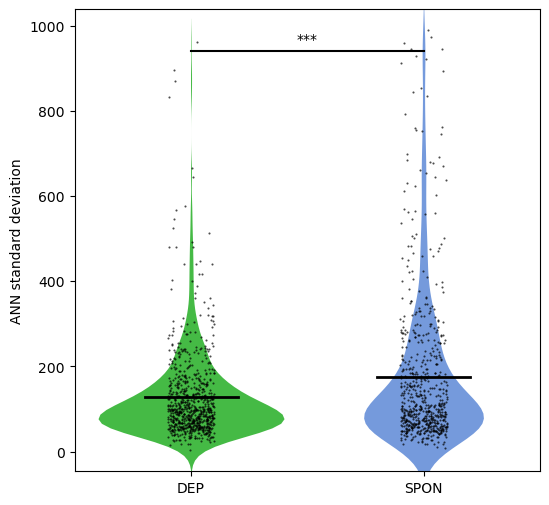

In [24]:


x = '647nm'
custom_palette = ['limegreen', 'cornflowerblue']
conditions = ['DEP', 'SPON']
storm_data['median'] = storm_data['nearest_neighbor_680'].apply(lambda x:median(x))

fig, axes = plt.subplots(1, 1, figsize=(6, 6))

# variance plot
sns.violinplot(data=storm_data.sort_values(by=[x]), x=x, y='median', ax=axes, 
             linewidth=0, palette=custom_palette, alpha=0.5)
sns.stripplot(data=storm_data.sort_values(by=[x]), x=x, y='median', 
              ax=axes, jitter=True, color='black', alpha=0.7, size=1.5)

axes.set_xlim([-0.5, len(storm_data[x].unique())-0.5])
for i, group in enumerate(storm_data.groupby(x)):
    mean_val = group[1]['median'].mean()
    print(mean_val)
    axes.plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)
axes.set_xticklabels(conditions, fontsize=10)
axes.set_ylabel('ANN standard deviation')
axes.set(xlabel=None)

ttest_std, pval_std = sc.ttest_ind(storm_data[storm_data[x]=='DEP647']['median'], 
                           storm_data[storm_data[x]=='SPON647']['median'])

axes.text(0.5, 0.95, f"{pval_significance(pval_std)}", ha='center', va='top', transform=axes.transAxes)
axes.axhline(940, 0.25, 0.75, color='black', linewidth=1.5)



<Axes: xlabel='median', ylabel='centroid_dist_680'>

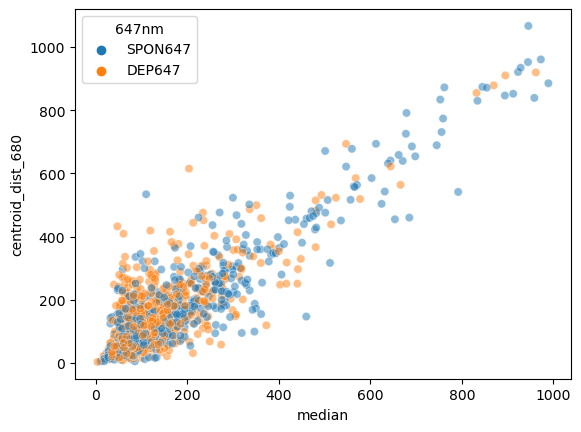

In [9]:
sns.scatterplot(data=storm_data, x="median", y='centroid_dist_680', hue = '647nm', alpha=0.5)

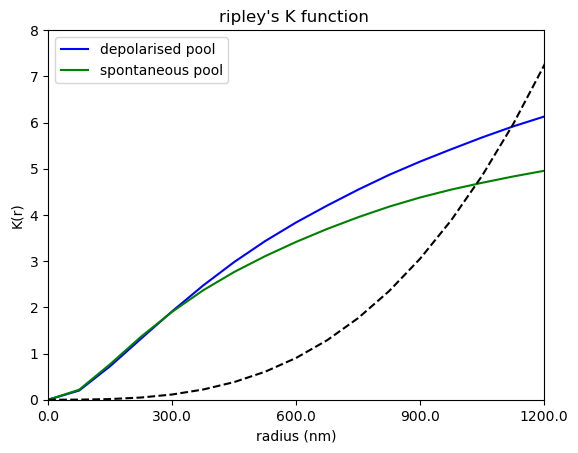

In [837]:
#univariate ripleyk

radii = np.linspace(0,1.5,21)

dep_ripley = storm_data[storm_data['647nm'] == 'DEP647']['univariate_ripleyk'].to_numpy()
spon_ripley = storm_data[storm_data['647nm'] == 'SPON647']['univariate_ripleyk'].to_numpy()

csr = (radii**3)*np.pi*4/3

mean_dep_ripley = np.mean(dep_ripley, axis=0)
mean_spon_ripley = np.mean(spon_ripley, axis=0)
std_dep_ripley = np.std(dep_ripley, axis=0)
std_spon_ripley = np.std(spon_ripley, axis=0)

plt.plot(np.array([mean_dep_ripley, mean_spon_ripley]).T)
plt.plot(csr, c='black', linestyle = '--')

# plt.errorbar(
#     x=np.arange(len(mean_dep_ripley)),
#     y=mean_dep_ripley,
#     yerr=std_dep_ripley,
#     color='blue',
#     ecolor='lightblue',
#     label='depolarised pool',
# )
# plt.errorbar(
#     x=np.arange(len(mean_spon_ripley)),
#     y=mean_spon_ripley,
#     yerr=std_spon_ripley,
#     color='green',
#     ecolor='lightgreen',
#     label='spontaneous pool',
# )

# plt.axhline(y=0, color='black', linestyle='-')

plt.gca().get_lines()[0].set_color('blue')  # dep_ripley line color
plt.gca().get_lines()[1].set_color('green')  # spon_ripley line color


# Plot vertical dotted lines at the maxima
# dep_max_idx = np.argmax(np.mean(dep_ripley, axis=0))
# spon_max_idx = np.argmax(np.mean(spon_ripley, axis=0))

# plt.axvline(x=dep_max_idx, color='blue', linestyle=':', linewidth=1)
# plt.axvline(x=spon_max_idx, color='green', linestyle=':', linewidth=1)

plt.xticks(list(np.linspace(0,20,6)), labels=np.linspace(0,1500,6))
plt.xlim(0,16)
plt.ylim(0,8)
# Add titles and axis labels
plt.ylabel("K(r)")
plt.xlabel('radius (nm)')
plt.legend(['depolarised pool', 'spontaneous pool'])
plt.title("ripley's K function ")
plt.show()
# Show plot

In [383]:
sc.kstest(mean_dep_ripley, mean_spon_ripley)

KstestResult(statistic=0.38095238095238093, pvalue=0.09481656218610322, statistic_location=5.327065452283748, statistic_sign=-1)

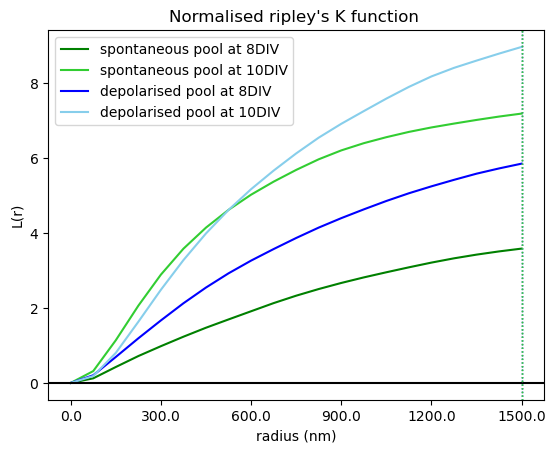

In [331]:
#multivariate ripleyk - not in use


radii = np.linspace(0,1.5,21)

spon_8_r = storm_data[storm_data['markertype and DIV']=='SPON6478DIV']['univariate_ripleyk'].to_numpy()
spon_10_r = storm_data[storm_data['markertype and DIV']=='SPON64710DIV']['univariate_ripleyk'].to_numpy()
dep_8_r = storm_data[storm_data['markertype and DIV']=='DEP6478DIV']['univariate_ripleyk'].to_numpy()
dep_10_r = storm_data[storm_data['markertype and DIV']=='DEP64710DIV']['univariate_ripleyk'].to_numpy()

csr = radii*np.pi*4/3

plt.plot(np.array([np.mean(spon_8_r, axis=0), 
                   np.mean(spon_10_r, axis=0),
                   np.mean(dep_8_r, axis=0),
                   np.mean(dep_10_r, axis=0)]).T)
plt.axhline(y=0, color='black', linestyle='-')

plt.gca().get_lines()[0].set_color('green')  # dep_ripley line color
plt.gca().get_lines()[1].set_color('limegreen')  # dep_ripley line color
plt.gca().get_lines()[2].set_color('blue')  # spon_ripley line color
plt.gca().get_lines()[3].set_color('skyblue')  # spon_ripley line color


# Plot vertical dotted lines at the maxima
spon_8_max_idx = np.argmax(np.mean(spon_8_r, axis=0))
dep_8_max_idx = np.argmax(np.mean(dep_8_r, axis=0))
spon_10_max_idx = np.argmax(np.mean(spon_10_r, axis=0))
dep_10_max_idx = np.argmax(np.mean(dep_10_r, axis=0))


plt.axvline(x=dep_8_max_idx, color='blue', linestyle=':', linewidth=1)
plt.axvline(x=spon_8_max_idx, color='green', linestyle=':', linewidth=1)
plt.axvline(x=dep_10_max_idx, color='skyblue', linestyle=':', linewidth=1)
plt.axvline(x=spon_10_max_idx, color='limegreen', linestyle=':', linewidth=1)

plt.xticks(list(np.linspace(0,20,6)), labels=np.linspace(0,1500,6))
# Add titles and axis labels
plt.ylabel("L(r)")
plt.xlabel('radius (nm)')
plt.legend(['spontaneous pool at 8DIV', 'spontaneous pool at 10DIV', 'depolarised pool at 8DIV', 'depolarised pool at 10DIV'])
plt.title("Normalised ripley's K function ")
plt.show()
# Show plot